# Connecticut Real Estate 2011-2021
### Aaron 'Asa' Sherwyn
# 05 Linear Regression Analyses
1. Imports and Set-up
1. Assessed Value vs Sale Amount
    - Hypothesis: As assessed value increases, sale amount increases.
1. Street Number vs Sale Amount
    - Hypothesis: As street number increases, sale amount decreases.
1. Year vs Assessment/Sales Ratio
    - Hypothesis: As year increases, normalized assessment sales ratio decreases.

## 1. Imports and Set-up

In [2]:
#loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Creating a path to the root directory for this project

path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A6\Connecticut Real Estate 2001-2020'

In [4]:
#Importing main dataframe

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CTRE 2011-2021 RES ONLY.pkl'))

In [5]:
#Increasing display limit

pd.set_option('display.max_rows', 200)

In [6]:
#Ensuring graphs are displayed within the notebook without "call"ing first

%matplotlib inline

### Checking dataframe

In [7]:
#Checking df

df.head(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,month,year,street_number,street_suffix,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category
1,20002,2020,Ashford,253000,430000.0,0.588300,Single Family,10,2020,390.0,ROAD,4193,41.8731,-72.1216,254.076,99576.50,169240.70,0.588372,Low range,Average ratio
2,200212,2020,Avon,130400,179900.0,0.724800,Condo,3,2021,5.0,DRIVE,18821,41.8096,-72.8305,258.935,50360.13,69476.90,0.724847,Low range,Average ratio
3,200243,2020,Avon,619290,890000.0,0.695800,Single Family,4,2021,111.0,DRIVE,18821,41.8096,-72.8305,261.237,237060.60,340686.81,0.695831,Mid range,Average ratio
4,200377,2020,Avon,862330,1447500.0,0.595700,Single Family,7,2021,70.0,DRIVE,18821,41.8096,-72.8305,267.789,322018.45,540537.51,0.595737,Mid range,Average ratio
5,200109,2020,Avon,847520,1250000.0,0.678000,Single Family,12,2020,57.0,DRIVE,18821,41.8096,-72.8305,254.081,333562.92,491969.10,0.678016,Mid range,Average ratio
6,2020313,2020,Berlin,412000,677500.0,0.608100,Single Family,7,2021,216.0,ROAD,20107,41.6215,-72.7457,267.789,153852.47,252997.70,0.608118,Mid range,Average ratio
8,20139,2020,Bethel,171360,335000.0,0.511500,Single Family,12,2020,16.0,DRIVE,20287,41.3712,-73.4140,254.081,67443.06,131847.72,0.511522,Low range,Average ratio
9,200086,2020,Bethlehem,168900,352000.0,0.479800,Single Family,8,2021,39.0,ROAD,3408,41.6404,-73.2058,268.387,62931.51,131153.89,0.479830,Low range,Low ratio
10,2000381,2020,Bloomfield,163730,250000.0,0.654900,Condo,9,2021,9.0,RIDGE,21399,41.8265,-72.7301,269.086,60846.72,92907.10,0.654920,Low range,Average ratio
11,200258,2020,Branford,530500,700000.0,0.757800,Single Family,1,2021,34.0,NaN,28230,41.2799,-72.8141,255.296,207798.01,274191.53,0.757857,Mid range,Average ratio


In [8]:
#Checking df

df.tail(20)

,serial_number,list_year,town,assessed_value,sale_amount,sales_ratio,residential_type,month,year,street_number,street_suffix,population,latitude,longitude,price_index,norm_assessed_value,norm_sale_amount,norm_sales_ratio,sale_category,ratio_category
435159,100012,2010,Woodbridge,284900,415000.0,0.686506,Single Family,10,2010,34.0,ROAD,9073,41.3526,-73.0084,214.623,132744.39,193362.31,0.686506,Low range,Average ratio
435160,10155,2010,Milford,269100,310000.0,0.868065,Condo,12,2010,4.0,ROAD,52308,41.2307,-73.0640,215.262,125010.45,144010.55,0.868065,Low range,High ratio
435161,100027,2010,Branford,111100,139000.0,0.799281,Condo,11,2010,346.0,NaN,28230,41.2799,-72.8141,214.750,51734.58,64726.43,0.799281,Low range,Average ratio
435162,100117,2010,Newington,65310,97000.0,0.673299,Condo,10,2010,85.0,DRIVE,30493,41.6973,-72.7228,214.623,30430.10,45195.53,0.673299,Low range,Average ratio
435163,10146,2010,Bloomfield,358470,560000.0,0.640125,Single Family,6,2011,19.0,LANE,21399,41.8265,-72.7301,222.522,161094.18,251660.51,0.640125,Mid range,Average ratio
435164,10212,2010,Hamden,181160,207500.0,0.873060,Single Family,3,2011,4.0,CIRCLE,61160,41.3839,-72.9026,220.024,82336.47,94307.89,0.873060,Low range,High ratio
435165,10055,2010,North Haven,168980,190000.0,0.889368,Single Family,12,2010,9.0,ROAD,24217,41.3903,-72.8595,215.262,78499.69,88264.53,0.889368,Low range,High ratio
435166,100846,2010,Stamford,738830,687500.0,1.074662,Single Family,6,2011,143.0,ROAD,134820,41.0534,-73.5387,222.522,332025.60,308958.22,1.074662,Mid range,High ratio
435167,10088,2010,Groton,114240,128000.0,0.892500,Single Family,12,2010,1.0,COURT,38686,41.3497,-72.0791,215.262,53070.21,59462.42,0.892500,Low range,High ratio
435168,10076,2010,Brookfield,349480,439000.0,0.796082,Single Family,3,2011,NaN,ROAD,17428,41.4826,-73.4096,220.024,158837.22,199523.69,0.796082,Low range,Average ratio


In [9]:
#Checking df

df.shape

(430492, 20)

Check!

## 2. Assessed Value vs Sale Amount

#### Hypothesis: As assessed value increases, sale amount increases.
X = assessed_value<br>
y = sale_amount

### 2.1 Data prep

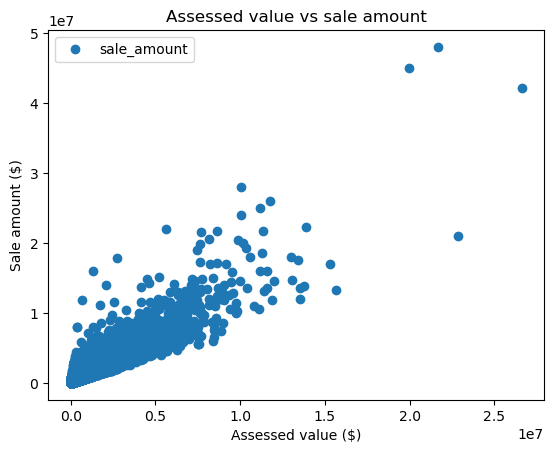

In [10]:
#Preliminary view of the variables' relationship

df.plot(x = 'assessed_value', y='sale_amount', style='o')
plt.title('Assessed value vs sale amount')  
plt.xlabel('Assessed value ($)')  
plt.ylabel('Sale amount ($)')  
plt.show()

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['assessed_value'].values.reshape(-1,1)
y = df['sale_amount'].values.reshape(-1,1)

In [12]:
X

array([[253000],
       [130400],
       [619290],
       ...,
       [ 81900],
       [537330],
       [148070]], dtype=int64)

In [13]:
y

array([[430000.],
       [179900.],
       [890000.],
       ...,
       [113000.],
       [730000.],
       [188000.]])

In [14]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2.2 Regression Analysis

In [15]:
# Create a regression object.

regression = LinearRegression()

In [16]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

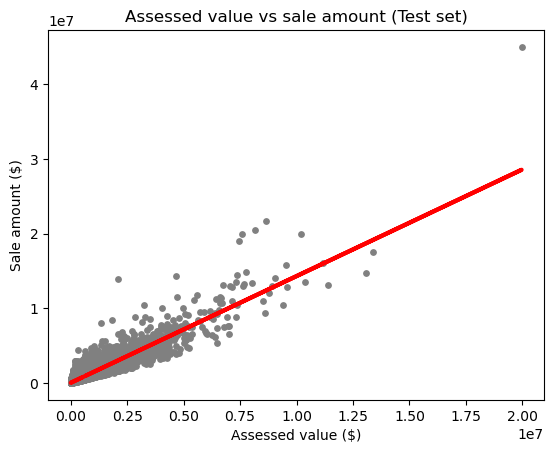

In [18]:
# Plotting the modeled regression line on on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Assessed value vs sale amount (Test set)')
plot_test.xlabel('Assessed value ($)')
plot_test.ylabel('Sale amount ($)')
plot_test.savefig('regression_assessed_v_sale_test.png')
plot_test.show()

In [19]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted, squared = False)
r2 = r2_score(y_test, y_predicted)

In [20]:
# Printing the model summary statistics.

print('Slope:' ,regression.coef_)
print('RMSE: ', rmse)
print('R2 score: ', r2)

Slope: [[1.42915094]]
RMSE:  180646.94508058747
R2 score:  0.8893682239208565


>Notes: A RMSE of ~180,000 is troubling, however an R2 score of 0.89 is reassuring. Assessed value can be a strong indicator of sale amount, but there are likely other contributing factors to sale amount.

#### Comparing the regression to the training set

In [21]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [22]:
#Calculating RMSE and R2

rmse = mean_squared_error(y_train, y_predicted_train, squared = False)
r2 = r2_score(y_train, y_predicted_train)

In [23]:
#printing regression stats

print('Slope:' ,regression.coef_)
print('RMSE: ', rmse)
print('R2 score: ', r2)

Slope: [[1.42915094]]
RMSE:  193589.0144773155
R2 score:  0.8797452462937625


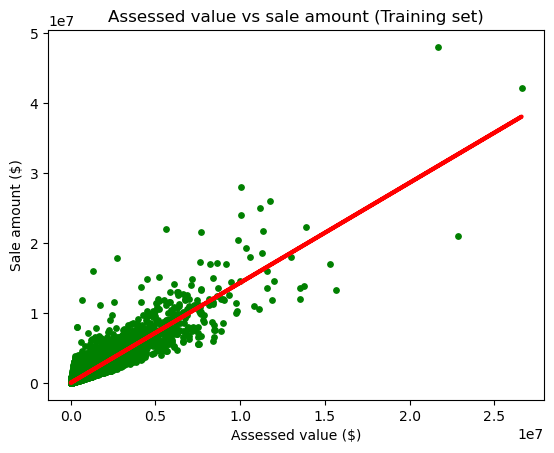

In [24]:
# Plotting the modeled regression line on on the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Assessed value vs sale amount (Training set)')
plot_test.xlabel('Assessed value ($)')
plot_test.ylabel('Sale amount ($)')
plot_test.savefig('regression_assessed_v_sale_train.png')
plot_test.show()

In [25]:
#Comparing actual y values with predicted y values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,685000.0,6.952866e+05
1,415000.0,2.641976e+05
2,452000.0,4.653363e+05
3,2730500.0,1.153072e+06
4,113900.0,1.617846e+05
5,275000.0,2.925233e+05
6,243500.0,2.452899e+05
7,325000.0,4.654363e+05
8,322500.0,3.131746e+05
9,202000.0,2.097898e+05


>Notes: There is little difference between the two regressions, thus the findings above stand: the large RMSE is likely due to the variety of properties available in residential real estate and more independent variables are needed to reduce the RMSE.

## 3. Street Number vs Sale Amount

#### Hypothesis: As street number increases, sale amount decreases. 
X = street_number<br>
y = sale_amount

### 3.1 Data prep

In [26]:
#Filling NaN values with median values for the analysis

df['street_number'] = df['street_number'].fillna(df['street_number'].median())

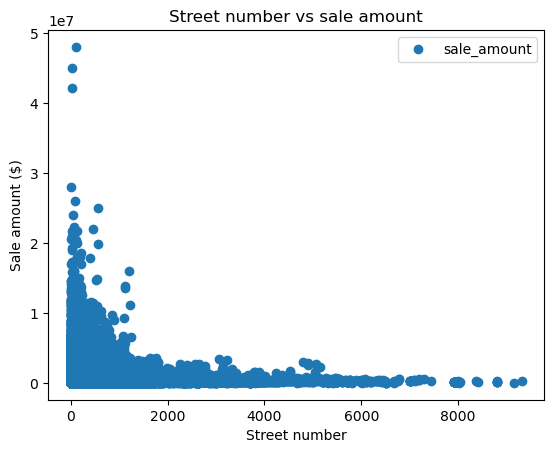

In [27]:
#Preliminary view of the variables' relationship

df.plot(x = 'street_number', y='sale_amount', style='o')
plt.title('Street number vs sale amount')  
plt.xlabel('Street number')  
plt.ylabel('Sale amount ($)')  
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['street_number'].values.reshape(-1,1)
y = df['sale_amount'].values.reshape(-1,1)

In [29]:
X

array([[390.],
       [  5.],
       [111.],
       ...,
       [ 16.],
       [ 45.],
       [ 40.]])

In [30]:
y

array([[430000.],
       [179900.],
       [890000.],
       ...,
       [113000.],
       [730000.],
       [188000.]])

In [31]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.2 Regression Analysis

In [32]:
# Create a regression object.

regression = LinearRegression()

In [33]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

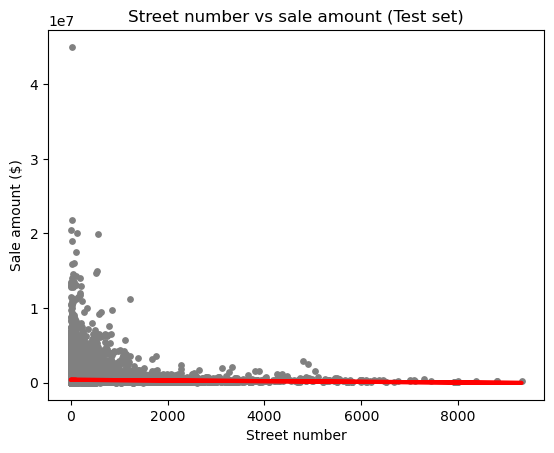

In [35]:
# Plotting the modeled regression line on on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Street number vs sale amount (Test set)')
plot_test.xlabel('Street number')
plot_test.ylabel('Sale amount ($)')
plot_test.savefig('regression_street_number_v_sale_test.png')
plot_test.show()

In [36]:
#Calculating RMSE and R2

rmse = mean_squared_error(y_test, y_predicted, squared = False)
r2 = r2_score(y_test, y_predicted)

In [37]:
# Printing the model summary statistics.

print('Slope:' ,regression.coef_)
print('RMSE: ', rmse)
print('R2 score: ', r2)

Slope: [[-45.07986404]]
RMSE:  542873.1561315476
R2 score:  0.0008852375458023864


>Notes: With a very large RMSE and very small R2 score, a linear regression is a poor match for this relationship and their relationship might simply be non-existant.

#### Comparing the regression to the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [39]:
#Calculating RMSE and R2

rmse = mean_squared_error(y_train, y_predicted_train, squared = False)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
#Printing regression stats

print('Slope:' ,regression.coef_)
print('RMSE: ', rmse)
print('R2 score: ', r2)

Slope: [[-45.07986404]]
RMSE:  558003.6041134221
R2 score:  0.000886462746840122


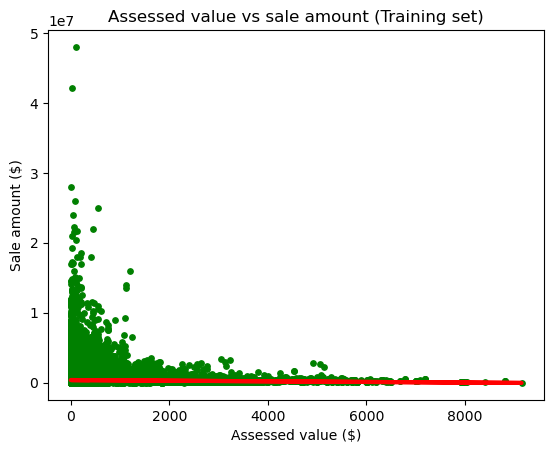

In [41]:
# Plotting the modeled regression line on on the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Assessed value vs sale amount (Training set)')
plot_test.xlabel('Assessed value ($)')
plot_test.ylabel('Sale amount ($)')
plot_test.savefig('regression_street_number_v_sale_train.png')
plot_test.show()

In [42]:
#Comparing actual y values with predicted y values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,685000.0,372705.854886
1,415000.0,375906.525232
2,452000.0,362247.326429
3,2730500.0,375681.125912
4,113900.0,374959.848087
5,275000.0,372615.695158
6,243500.0,364907.038407
7,325000.0,369685.503995
8,322500.0,376086.844688
9,202000.0,364861.958543


>Notes: the regression performed similarly on both sets, thus the findings above stand. The predicted y's are too dissimilar to the actual y's to be reliable.

## 4. Year vs Assessment/Sales Ratio

#### Hypothesis: As year increases, normalized assessment sales ratio decreases
X = year<br>
y = norm_sales_ratio

### 4.1 Data prep

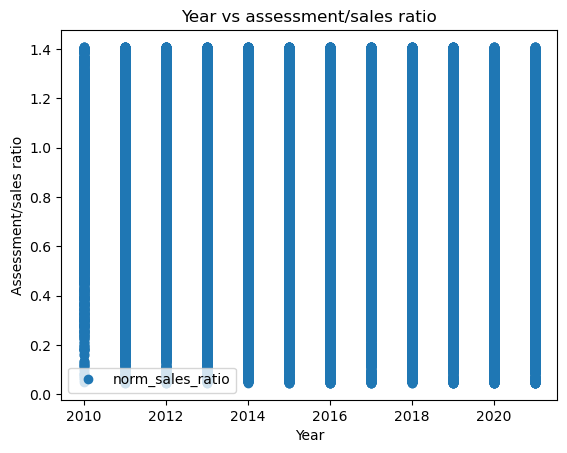

In [43]:
#Preliminary view of the variables' relationship

df.plot(x = 'year', y='norm_sales_ratio', style='o')
plt.title('Year vs assessment/sales ratio')  
plt.xlabel('Year')  
plt.ylabel('Assessment/sales ratio')  
plt.show()

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['year'].values.reshape(-1,1)
y = df['norm_sales_ratio'].values.reshape(-1,1)

In [45]:
X

array([[2020],
       [2021],
       [2021],
       ...,
       [2010],
       [2011],
       [2011]])

In [46]:
y

array([[0.58837206],
       [0.72484711],
       [0.69583146],
       ...,
       [0.72477877],
       [0.7360685 ],
       [0.78760638]])

In [47]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.2 Regression Analysis

In [48]:
# Create a regression object.

regression = LinearRegression()

In [49]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

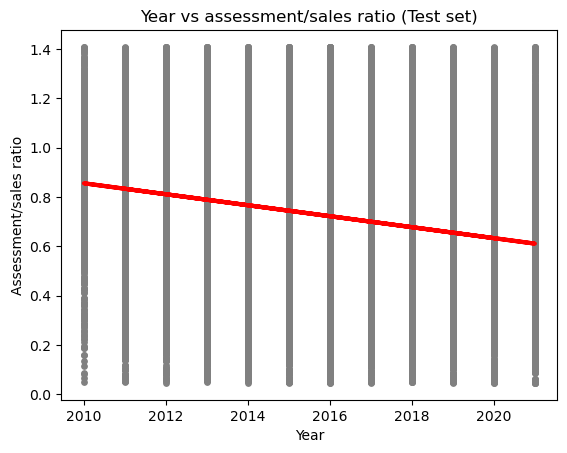

In [51]:
# Plotting the modeled regression line on on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year vs assessment/sales ratio (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Assessment/sales ratio')
plot_test.savefig('regression_year_v_sales_ratio_test.png')
plot_test.show()

In [52]:
#Calculating RMSE and R2

rmse = mean_squared_error(y_test, y_predicted, squared = False)
r2 = r2_score(y_test, y_predicted)

In [53]:
# Printing the model summary statistics.

print('Slope:' ,regression.coef_)
print('RMSE: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02223381]]
RMSE:  0.1921618466356229
R2 score:  0.11342337175510242


>Notes: The RMSE is small, but about 13% of the data range which makes it moderately good. An R2 score of 0.11 is quite small, thus this relationship is not very noteworthy.

#### Comparing the regression to the training set

In [54]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [55]:
#Calculating RMSE and R2

rmse = mean_squared_error(y_train, y_predicted_train, squared = False)
r2 = r2_score(y_train, y_predicted_train)

In [56]:
#Printing regression stats

print('Slope:' ,regression.coef_)
print('RMSE: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02223381]]
RMSE:  0.19286530561974405
R2 score:  0.1142363813605417


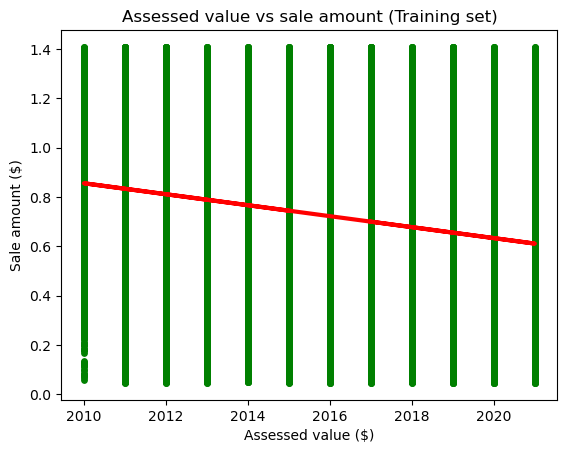

In [57]:
# Plotting the modeled regression line on on the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Assessed value vs sale amount (Training set)')
plot_test.xlabel('Assessed value ($)')
plot_test.ylabel('Sale amount ($)')
plot_test.savefig('regression_year_v_sales_ratio_train.png')
plot_test.show()

In [58]:
#Comparing actual y values with predicted y values

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.693869,0.833602
1,0.418458,0.611264
2,0.695575,0.766900
3,0.291383,0.789134
4,0.895522,0.611264
5,0.703564,0.633497
6,0.658850,0.744666
7,0.967600,0.677965
8,0.644744,0.655731
9,0.671238,0.766900


>Notes: the regression performed similarly on both sets, thus the findings above stand. The predicted y's are too dissimilar to the actual y's to be reliable.